# **Table of Contents**
* [Exploration & Wrangling](#section_22)
    <br><br>
* [Model Building](#section_23)
    * [LOR](#section_24)
    * [KNN](#section_25)
    * [NB](#section_3)
    * [DT](#section_4)
    * [RF](#section_5)
    * [Bagging](#section_6)
    * [Boosting](#section_7)
    <br><br>
* [Model Selection](#section_21)
    * [Scores](#section_8)
    * [Rank](#section_9)
    * [Best Model](#section_10)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats       as stats 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from  sklearn.linear_model     import   LogisticRegression
from  sklearn.naive_bayes      import   GaussianNB
from  sklearn.neighbors        import   KNeighborsClassifier
from  sklearn.tree             import   DecisionTreeClassifier
from  sklearn.ensemble         import   RandomForestClassifier , BaggingClassifier ,  AdaBoostClassifier , GradientBoostingClassifier ,  VotingClassifier


from  sklearn.preprocessing     import   StandardScaler
from  sklearn.model_selection   import   train_test_split , KFold , cross_val_score , GridSearchCV 

from  sklearn  import  metrics

In [3]:
df = pd.read_csv ("datasets/Wine.csv", names =  ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

df.sample(3)

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
48,1,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060


**Cultivator is the target column**

<a id='section_22'></a>
# **Part I - Exploration & Wrangling**

In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.corr()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


**Ash is the weakest column**

## i. **Weak Correlated columns**

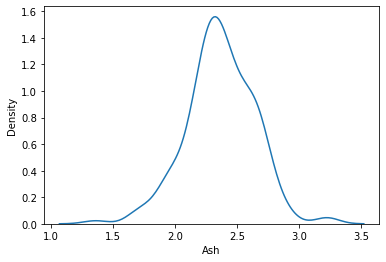

In [7]:
sns.kdeplot ( df['Ash'] )  ; 

In [8]:
g1  =  df [ df['Cultivator']==1 ]
g2  =  df [ df['Cultivator']==2 ]
g3  =  df [ df['Cultivator']==3 ]

In [9]:
stats.f_oneway ( g1['Ash'] , g2['Ash'] , g3['Ash'] )

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

## ii. **Target column**

In [10]:
df ['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

## iii. **Scaling**

In [11]:
x = df .drop ('Cultivator' , axis=1)
y = df ['Cultivator']

In [12]:
sc = StandardScaler()

x  = sc.fit_transform(x)

<a id='section_23'></a>
# **Part II - Model Building**

In [13]:
x_train, x_test, y_train, y_test  =  train_test_split ( x, y, test_size =0.4, random_state =0 )

kf  =  KFold (shuffle=True, n_splits=3, random_state=0) 

<a id='section_24'></a>
## **1 - LOR**

In [14]:
LOR = LogisticRegression()           

<a id='section_25'></a>
## **2 - KNN**

### Finding best hyper-parameter

In [15]:
KNN = KNeighborsClassifier ()

param = { 'n_neighbors': np.arange(1,20)   ,   'weights':['uniform','distance'] } 

GS  =  GridSearchCV ( KNN , param , cv=kf , scoring='f1_weighted' )

GS.fit ( x_train , y_train )

GS.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [16]:
KNN = KNeighborsClassifier ( n_neighbors =15  ,  weights ='distance') 

<a id='section_3'></a>
## **3 - Naive Bayes**

In [17]:
NB = GaussianNB()

<a id='section_4'></a>
## **4 - Decision Tree**

### **4.1 - Fully Grown**

In [18]:
FDT = DecisionTreeClassifier (random_state=0)             

### **4.2 - Regularised**

* Finding best hyper-parameter

In [20]:
param = { 'max_depth': np.arange(1,10)   ,   'criterion':['entropy','gini'] } 

GS  =  GridSearchCV ( FDT , param , cv=kf , scoring='f1_weighted')

GS.fit ( x_train , y_train )

GS.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [21]:
RDT = DecisionTreeClassifier (criterion='entropy' , max_depth=3 ,  random_state=0)

<a id='section_5'></a>
## **5 - Random Forest**

* Finding best n_estimator for least VE

In [22]:
VE = []


for i in np.arange(1,20):
    
    RF = RandomForestClassifier ( n_estimators =i, criterion ='entropy', random_state =0 )
    
    score = cross_val_score ( RF ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    VE.append ( np.std(score,ddof=1) )
    
    
np.argmin(VE)

11

In [23]:
RF = RandomForestClassifier ( n_estimators=12 , criterion='entropy', random_state =0 )  

<a id='section_6'></a>
## **6 - Bagging**

### **6.1 - LOR_Bag**

In [24]:
VE = []

for i in np.arange(1,30):                                                    
    
    LOR_bag = BaggingClassifier   ( base_estimator = LOR , n_estimators =i, random_state =0 )
    
    score   = cross_val_score     ( LOR_bag ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    VE.append ( np.std(score,ddof=1) )
    

np.argmin(VE)

18

In [25]:
LOR_bag = BaggingClassifier   ( base_estimator = LOR , n_estimators =19, random_state =0 )

### **6.2 - NB_Bag**

In [26]:
VE = []

for i in np.arange(1,20):
    
    NB_bag = BaggingClassifier ( base_estimator = NB , n_estimators =i, random_state =0 )
    
    score   = cross_val_score ( NB_bag ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    VE.append ( np.std(score,ddof=1) )
    
    
np.argmin(VE) 

2

In [27]:
NB_bag = BaggingClassifier ( base_estimator = NB , n_estimators =3, random_state =0 )

### **6.3 - KNN_Bag**

In [28]:
VE = []

for i in np.arange(1,20):
    
    KNN_bag = BaggingClassifier ( base_estimator = KNN , n_estimators =i, random_state =0 )
    
    score   = cross_val_score ( KNN_bag ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    VE.append ( np.std(score,ddof=1) )
    

np.argmin(VE) 

18

In [29]:
KNN_bag = BaggingClassifier ( base_estimator = KNN , n_estimators =19, random_state =0 )

<a id='section_7'></a>
## **7 - Boosting**

## **7.1 - AdaBoost**

### 7.1.1 - **Regularised DT boost** (default)

In [30]:
BE = []

for i in np.arange(1,20):                                                                    
    
    RDT_boost   =  AdaBoostClassifier   ( n_estimators =i, random_state =0 )      # default base_estimator : Reg DT
    
    score       =  cross_val_score      ( RDT_boost ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    BE.append ( np.mean(1-score)  )
    
    
np.argmin(BE)

4

In [31]:
RDT_boost =  AdaBoostClassifier   ( n_estimators =5, random_state =0 )   

### 7.1.2 - **RF boost**

In [32]:
BE = []

for i in np.arange(1,20):                                                                    
    
    RF_boost =  AdaBoostClassifier  ( base_estimator = RF , n_estimators =i, random_state =0 )                                   
    
    score    = cross_val_score      ( RF_boost ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    BE.append ( np.mean(1-score)    )
    
    
np.argmin(BE)

0

* No scope for Boosting here

## **7.2 - XG Boost**

In [33]:
BE = []

for i in np.arange(1,20):                                                                    
    
    XG_boost =  GradientBoostingClassifier  ( n_estimators = i , random_state =0 )                                   
    
    score    =  cross_val_score             ( XG_boost ,  x_train ,  y_train ,  cv=kf,  scoring='f1_weighted' )
    
    BE.append ( np.mean(1-score)    )
    
    
np.argmin(BE)

7

In [34]:
XG_boost =  GradientBoostingClassifier  ( n_estimators =8, random_state =0 ) 

<a id='section_21'></a>
# **Part III - Model Selection**

<a id='section_8'></a>
## i. **Scores**

In [35]:
models = []

models.append  (( 'LOR'       , LOR        ))
models.append  (( 'NB'        , NB         ))
models.append  (( 'KNN'       , KNN        ))



models.append  (( 'FDT'       , FDT        ))
models.append  (( 'RDT'       , RDT        ))
models.append  (( 'RF'        , RF         ))



models.append  (( 'LOR_bag'   , LOR_bag    ))
models.append  (( 'NB_bag'    , NB_bag     ))
models.append  (( 'KNN_bag'   , KNN_bag    ))


models.append  (( 'RDT_boost' , RDT_boost  ))
#models.append  (( 'RF_boost'  , RF_boost   ))
models.append  (( 'XG_boost'  , XG_boost   ))

In [36]:
result =[]

for  i,j  in  models:
    
    score = cross_val_score ( j , x_train , y_train , cv =kf, scoring ='f1_weighted' )
    
    result.append ( { 'Name': i   ,   'BE': np.mean(1-score)   ,   'VE': np.std(score,ddof=1)  } )                


table = pd.DataFrame(result)

<a id='section_9'></a>
## ii - **Rank**

### By least Bias Error

In [39]:
table.sort_values (by='BE')    .head()      .style.hide_index()

Name,BE,VE
KNN,0.009136,0.015824
KNN_bag,0.018496,0.016022
NB,0.028073,0.028412
NB_bag,0.028217,0.000714
LOR,0.028337,0.000805


### By least Variance Error

In [40]:
table.sort_values (by='VE')    .head()      .style.hide_index()

Name,BE,VE
NB_bag,0.028217,0.000714
LOR,0.028337,0.000805
LOR_bag,0.028337,0.000805
XG_boost,0.065813,0.014688
KNN,0.009136,0.015824


<a id='section_10'></a>
## iii - **Best Model**

## *Naive Bayes Bagged*

In [42]:
NB_bag.fit      ( x_train , y_train )

y_pred   =    NB_bag.predict ( x_test )

In [44]:
print ( metrics.f1_score                ( y_pred , y_test , average='micro') )

print ( metrics.classification_report   ( y_pred , y_test ) )

0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        24
           2       0.87      1.00      0.93        27
           3       1.00      0.90      0.95        21

    accuracy                           0.94        72
   macro avg       0.96      0.94      0.95        72
weighted avg       0.95      0.94      0.95        72



In [45]:
print  ( y_test .value_counts()        )              # ACTUAL

print  ( pd .value_counts ( y_pred )   )              # PREDICTED

2    31
1    22
3    19
Name: Cultivator, dtype: int64
2    27
1    24
3    21
dtype: int64
